**Written and Directed by:** *Βασιλάκος Μιχαήλ - 03117069*

# **Συστήματα και Τεχνολογίες Γνώσης**
# **Θέμα 1**
Στο θέμα αυτό θα αναπτύξετε έναν γράφο γνώσης τον οποίο στη συνέχεια θα αξιοποιήσετε για ένα σύστημα συστάσεων (recommender system) που θα προτείνει ταινίες σε χρήστες.


## 1ο Μέρος: Εξοικείωση με το προγραμματιστικό περιβάλλον


Σε αυτό το μέρος θα δούμε πως μπορούμε να δημιουργήσουμε και να εμπλουτίσουμε ένα γράφο γνώσης, να συνδέσουμε πολλαπλούς γράφους καθώς και να διατυπώνουμε SPARQL ερωτήματα, μέσα από το προγραμματιστικό περιβάλλον του notebook.

Σας δίνεται ένας πολύ απλός γράφος γνώσης στο αρχείο lotr.nt, ο οποίος αποτελείται από τις παρακάτω τριάδες

```xml
<http://example.org/ns/tt0325980> <http://example.org/props/country> <http://example.org/ns/USA> .
<http://example.org/ns/tt0120737> <http://example.org/props/actor> <http://example.org/ns/Sean_Astin> .
<http://example.org/ns/tt0325980> <http://example.org/props/director> <http://example.org/ns/Gore_Verbinski> .
<http://example.org/ns/tt0120737> <http://example.org/props/actor> <http://example.org/ns/Cate_Blanchett> .
<http://example.org/ns/tt0120737> <http://example.org/props/budget> "$ 93000000"^^<http://www.w3.org/2001/XMLSchema#integer> .
<http://example.org/ns/tt0120737> <http://example.org/props/country> <http://example.org/ns/New_Zealand> .
<http://example.org/ns/tt0120737> <http://example.org/props/country> <http://example.org/ns/USA> .
<http://example.org/ns/tt0120737> <http://example.org/props/actor> <http://example.org/ns/Sala_Baker> .
<http://example.org/ns/tt0325980> <http://example.org/props/actor> <http://example.org/ns/Orlando_Bloom> .
<http://example.org/ns/tt0120737> <http://example.org/props/actor> <http://example.org/ns/Sean_Bean> .
<http://example.org/ns/tt0120737> <http://example.org/props/director> <http://example.org/ns/Peter_Jackson> .
<http://example.org/ns/tt0325980> <http://example.org/props/budget> "$ 140000000"^^<http://www.w3.org/2001/XMLSchema#integer> .
<http://example.org/ns/tt0120737> <http://example.org/props/actor> <http://example.org/ns/Orlando_Bloom> .
<http://example.org/ns/tt0325980> <http://example.org/props/title> "Pirates_of_the_Caribbean:_The_Curse_of_the_Black_Pearl"^^<http://www.w3.org/2001/XMLSchema#string> .
<http://example.org/ns/tt0120737> <http://example.org/props/title> "The_Lord_of_the_Rings:_The_Fellowship_of_the_Ring"^^<http://www.w3.org/2001/XMLSchema#string> .
```
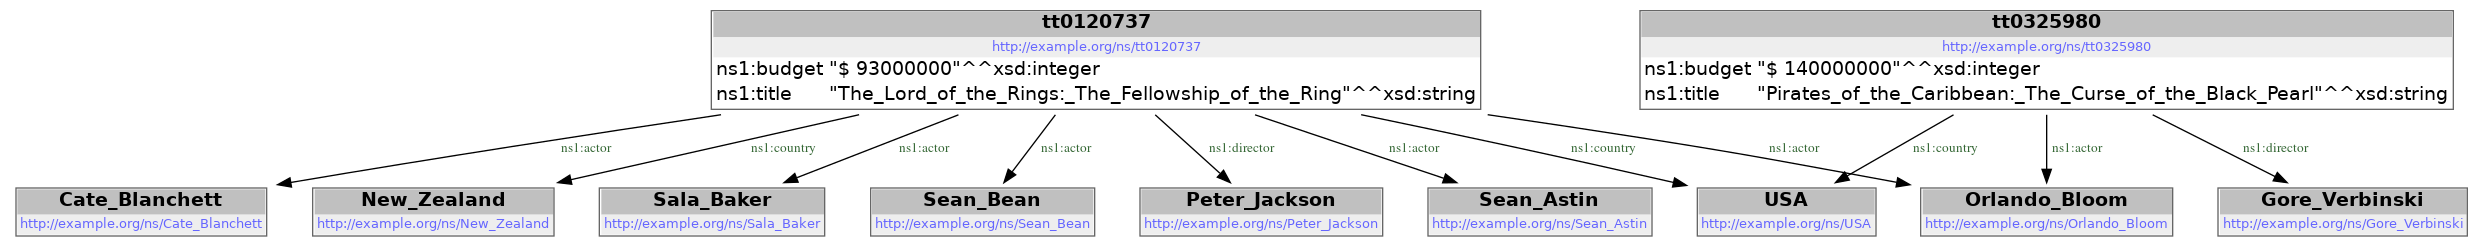




Ο γράφος αυτός περιέχει πληροφορίες για δύο ταινίες, την τοποθεσία που γυρίστηκαν, το σκηνοθέτη τους και κάποιους από τους ηθοποιούς. Χρησιμοποιεί δύο 'τεχνητούς' χώρους ονομάτων: http://example.org/ns/ και http://example.org/props/ όπου στον πρώτο ορίζονται τα ονόματα των οντοτήτων ενώ στο δεύτερο τα ονόματα των ιδιοτήτων τους.

Στην python μπορούμε να φορτώσουμε το γράφο με χρήση της βιβλιοθήκης rdflib.

In [3]:
!pip install rdflib

     |████████████████████████████████| 235kB 19.3MB/s 
     |████████████████████████████████| 51kB 6.9MB/s 


In [ ]:
from rdflib import Graph, Literal, URIRef, Namespace, XSD

## Αρχικοποίηση ενός κενού γράφου
g = Graph()

## Διάβασμα του αρχείου και προσθήκη στο γράφο
g.parse('lotr.nt',format='nt')

## Εκτύπωση όλων των κόμβων
print("All nodes of the graph:")
for node in g.all_nodes():
  print(node)

All nodes of the graph:
http://example.org/ns/Orlando_Bloom
http://example.org/ns/Sala_Baker
http://example.org/ns/Gore_Verbinski
$ 140000000
http://example.org/ns/Sean_Bean
http://example.org/ns/Sean_Astin
Pirates_of_the_Caribbean:_The_Curse_of_the_Black_Pearl
http://example.org/ns/New_Zealand
http://example.org/ns/USA
http://example.org/ns/Cate_Blanchett
http://example.org/ns/tt0120737
The_Lord_of_the_Rings:_The_Fellowship_of_the_Ring
http://example.org/ns/Peter_Jackson
$ 93000000
http://example.org/ns/tt0325980


Στο γράφο αυτό μπορούμε να διατυπώνουμε SPARQL ερωτήματα όπως φαίνεται στο παρακάτω κελί. 

Σε ποιες ταινίες παίζει ο Orlando Bloom?

In [ ]:
## Τα prefixes τα ορίζουμε στην αρχή του ερωτήματος για να μην κουβαλάμε τα namespaces μέσα στο ερώτημα
ans=g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?title
       WHERE {
          ?movie exp:actor ex:Orlando_Bloom .
          ?movie exp:title ?title
       }""")
for a in ans:
  print(a)

(rdflib.term.Literal('Pirates_of_the_Caribbean:_The_Curse_of_the_Black_Pearl', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')),)
(rdflib.term.Literal('The_Lord_of_the_Rings:_The_Fellowship_of_the_Ring', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')),)


Στο γράφο επίσης μπορούμε να προσθέσουμε τριάδες

π.χ. για να προσθέσουμε το γεγονός πως ο Ian McKellen παίζει στο Lord of the Rings

In [ ]:
## Ορίζουμε τους χώρους ονομάτων
ns1 = Namespace('http://example.org/ns/')
ns2 = Namespace('http://example.org/props/')

## URI της ταινίας
a = URIRef(ns1+"tt0120737")

## URI της ιδιότητας "έχει ηθοποιό"
b = URIRef(ns2+"actor")

## URI του Ian McKellen
c = URIRef(ns1+"Ian_McKellen")

## Προσθήκη της τριάδας a,b,c στο γράφο
g.add((a,b,c))

## Εκτύπωση όλων των κόμβων
print("All nodes of the graph:")
for node in g.all_nodes():
  print(node)

All nodes of the graph:
http://example.org/ns/Orlando_Bloom
$ 93000000
http://example.org/ns/Sala_Baker
The_Lord_of_the_Rings:_The_Fellowship_of_the_Ring
$ 140000000
http://example.org/ns/Gore_Verbinski
http://example.org/ns/Sean_Bean
http://example.org/ns/Sean_Astin
Pirates_of_the_Caribbean:_The_Curse_of_the_Black_Pearl
http://example.org/ns/New_Zealand
http://example.org/ns/Cate_Blanchett
http://example.org/ns/tt0120737
http://example.org/ns/Ian_McKellen
http://example.org/ns/Peter_Jackson
http://example.org/ns/USA
http://example.org/ns/tt0325980


Παρατηρήστε πως ο κόμβος που αναφέρεται στην οντότητα της ταινίας έχει URI <<http://example.org/ns/tt0120737>> και όχι <<http://example.org/ns/The_Lord_of_the_Rings:_The_Fellowship_of_the_Ring>>. Ο τίτλος μιας ταινίας είναι ένα string (literal) το οποίο συνδέεται με τον αντίστοιχο κόμβο μέσω της ακμής <<http://example.org/props/title>>. Αν χρειαζόταν να βρούμε το όνομα του συγκεκριμένου κόμβου θα μπορούσαμε να το κάνουμε μέσω SPARQL

In [ ]:
ans=g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?movie
       WHERE {
          ?movie exp:title "The_Lord_of_the_Rings:_The_Fellowship_of_the_Ring"^^xsd:string .
       }""")
for a in ans:
  print(a)

(rdflib.term.URIRef('http://example.org/ns/tt0120737'),)


όπου το ^^xsd:string υποδηλώνει πως αναφερόμαστε σε literal τύπου string

### Ερώτημα 1.1

Δημιουργήστε έναν νέο γράφο γνώσης (g2) από πληροφορίες που θα βρείτε ψάχνοντας στο διαδίκτυο, όμοιο με αυτόν που σας δίνεται, στον οποίο:
- Θα χρησιμοποιούνται τα ίδια namespaces με τον γράφο που δίνεται
- Θα περιέχονται 10 με 20 τριάδες
- Θα περιέχονται τουλάχιστον δύο ταινίες διαφορετικές από αυτές που περιέχονται στο γράφο που δίνεται
- Τουλάχιστον ένας κόμβος του γράφου θα έχει ίδιο URI με έναν κόμβο του γράφου που δίνεται, δηλαδή θα αναφέρεται στο ίδιο αντικείμενο του κόσμου (πχ ένας ηθοποιός ή ένας σκηνοθέτης) 

Στη συνέχεια θα διατυπώσετε δύο SPARQL ερωτήματα της επιλογής σας στο γράφο αυτόν, και θα εκτυπώσετε τις απαντήσεις. Περιγράψτε τι κάνει το κάθε ένα από αυτά τα ερωτήματα.

Μπορείτε να δημιουργήσετε το γράφο είτε μέσω του κώδικα όπως δείξαμε και παραπάνω, είτε δημιουργώντας τοπικά ένα αρχείο 'ntriples' (.nt), γράφοντας "με το χέρι" τις τριάδες με τη μορφή που είναι και στο lotr.nt,  και μετά φορτώνοντας το αρχείο στο notebook, όπως παρουσιάσαμε και για το δοθέν αρχείο (Graph.parse()). Σε περίπτωση που δημιουργήσετε το νέο γράφο μέσω κώδικα, μην ξεχάσετε να αποθηκεύσετε το γράφο σε ένα αρχείο με κωδικοποίηση 'ntriples' τρέχοντας την εντολή
```python
g2.serialize(destination='mygraph.nt', format='nt')
```
Εκτυπώστε όλες τις τριάδες του γράφου.

In [ ]:
## Solution 1.1
## Αρχικοποίηση ενός κενού γράφου
g = Graph()

## Ορίζουμε τους χώρους ονομάτων
ns1 = Namespace('http://example.org/ns/')
ns2 = Namespace('http://example.org/props/')

## Προσθέτουμε τον Sean Bean στον νέο γράφο (κοινό στοιχείο με αρχικό γράφο)
a = URIRef(ns1+"tt3659388")
b = URIRef(ns2+"actor")
c = URIRef(ns1+"Sean_Bean")

## Προσθήκη της τριάδας a,b,c στο γράφο
g.add((a,b,c))

a = URIRef(ns1+"tt3659388")
b = URIRef(ns2+"title")
g.add((a,b,Literal('The_Martian', datatype=XSD.string)))

a = URIRef(ns1+"tt3659388")
b = URIRef(ns2+"country")
c = URIRef(ns1+"USA")
g.add((a,b,c))

a = URIRef(ns1+"tt3659388")
b = URIRef(ns2+"country")
c = URIRef(ns1+"UK")
g.add((a,b,c))

a = URIRef(ns1+"tt3659388")
b = URIRef(ns2+"country")
c = URIRef(ns1+"Hungary")
g.add((a,b,c))

a = URIRef(ns1+"tt3659388")
b = URIRef(ns2+"country")
c = URIRef(ns1+"Jordan")
g.add((a,b,c))

a = URIRef(ns1+"tt3659388")
b = URIRef(ns2+"budget")
g.add((a,b,Literal('$ 108000000', datatype=XSD.integer)))

a = URIRef(ns1+"tt3659388")
b = URIRef(ns2+"director")
c = URIRef(ns1+"Ridley_Scott")
g.add((a,b,c))

a = URIRef(ns1+"tt3659388")
b = URIRef(ns2+"actor")
c = URIRef(ns1+"Matt_Damon")
g.add((a,b,c))

a = URIRef(ns1+"tt0119217")
b = URIRef(ns2+"title")
g.add((a,b,Literal('Good_Will_Hunting', datatype=XSD.string)))

a = URIRef(ns1+"tt0119217")
b = URIRef(ns2+"director")
c = URIRef(ns1+"Gus_Van_Sant")
g.add((a,b,c))

a = URIRef(ns1+"tt0119217")
b = URIRef(ns2+"country")
c = URIRef(ns1+"USA")
g.add((a,b,c))

a = URIRef(ns1+"tt0119217")
b = URIRef(ns2+"budget")
g.add((a,b,Literal('$ 10000000', datatype=XSD.integer)))

a = URIRef(ns1+"tt0119217")
b = URIRef(ns2+"actor")
c = URIRef(ns1+"Matt_Damon")
g.add((a,b,c))

a = URIRef(ns1+"tt0119217")
b = URIRef(ns2+"actor")
c = URIRef(ns1+"Casey_Affleck")
g.add((a,b,c))

a = URIRef(ns1+"tt4034228")
b = URIRef(ns2+"actor")
c = URIRef(ns1+"Casey_Affleck")
g.add((a,b,c))

a = URIRef(ns1+"tt4034228")
b = URIRef(ns2+"title")
g.add((a,b,Literal('Manchester_by_the_Sea', datatype=XSD.string)))

a = URIRef(ns1+"tt4034228")
b = URIRef(ns2+"country")
c = URIRef(ns1+"USA")
g.add((a,b,c))

a = URIRef(ns1+"tt4034228")
b = URIRef(ns2+"director")
c = URIRef(ns1+"Kenneth_Lonergan")
g.add((a,b,c))

a = URIRef(ns1+"tt4034228")
b = URIRef(ns2+"budget")
g.add((a,b,Literal('$ 9000000', datatype=XSD.integer)))

## Το πρώτο ερώτημα επιστρέφει τους τίτλους των ταινιών με μικρό budget (< $ 12,000,000)
## Επειδή στον αρχικό γράφο περιέχεται το '$ ' στα budget, για να υπάρχει ομοιμορφία στα στοιχεία μας 
## θα τα εισάγουμε με τον ίδιο τρόπο. Για να γίνει λοιπόν η σύγκριση '<' η οποία θα γίνει σαν σύγκριση
## strings (αλφαριθμητική) θα χρειαστούμε και όριο στο μήκος του πεδίου.
print("Low budget films:")
ans=g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT ?title
       WHERE {
          ?movie exp:budget ?budget.
          ?movie exp:title ?title.
          FILTER (strlen(str(?budget)) < 11).
          FILTER (?budget < '$ 12000000').
       }""")
for a in ans:
  print(a)

## Το δεύτερο ερώτημα επιστρέφει τις ταινίες στις οποίες έχει συμμετάσχει ο Matt Damon ως ηθοποιός
print("\nFilms starring Matt Damon:")
ans=g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT ?title
       WHERE {
          ?movie exp:actor ex:Matt_Damon.
          ?movie exp:title ?title.
       }""")
for a in ans:
  print(a)

## Τέλος, εμφανίζουμε όλες τις τριάδες του γράφου
print("\nAll triples in the graph:")
ans=g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT ?a ?b ?c
       WHERE {
          ?a ?b ?c
       }""")
for a in ans:
  print(a)

g.serialize(destination='mygraph.nt', format='nt')

Low budget films:
(rdflib.term.Literal('Manchester_by_the_Sea', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')),)
(rdflib.term.Literal('Good_Will_Hunting', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')),)

Films starring Matt Damon:
(rdflib.term.Literal('Good_Will_Hunting', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')),)
(rdflib.term.Literal('The_Martian', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')),)

All triples in the graph:
(rdflib.term.URIRef('http://example.org/ns/tt3659388'), rdflib.term.URIRef('http://example.org/props/country'), rdflib.term.URIRef('http://example.org/ns/USA'))
(rdflib.term.URIRef('http://example.org/ns/tt3659388'), rdflib.term.URIRef('http://example.org/props/actor'), rdflib.term.URIRef('http://example.org/ns/Sean_Bean'))
(rdflib.term.URIRef('http://example.org/ns/tt3659388'), rdflib.term.URIRef('http://example.org/props/title'), rdflib.term.Literal('The_Mart

### Ερώτημα 1.2

Σε έναν νέο γράφο θα φορτώσετε και τα δύο αρχεία (mygraph.nt, lotr.nt) και θα διατυπώσετε ένα SPARQL ερώτημα στην απάντηση του οποίου να φαίνεται πως οι δύο γράφοι είναι συνδεδεμένοι.

Για να φορτώσετε δύο αρχεία στον ίδιο γράφο τρέχετε τις εντολές
```
g = Graph()
g.parse('lotr.nt',format='nt')
g.parse('mygraph.nt',format='nt')
```

In [ ]:
## Solution 1.2
g = Graph()
g.parse('lotr.nt',format='nt')
g.parse('mygraph.nt',format='nt')

## Οι δύο γράφοι έχουν ως κοινό στοιχείο τον ηθοποιό Sean Bean, οπότε επιστρέφοντας τους τίτλους των ταινιών
## στις οποίες συμμετέχει ως ηθοποιός ο Sean Bean θα δούμε δύο ταινίες καθεμία από τις οποίες ανήκει σε διαφορετικό γράφο
ans=g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT ?title
       WHERE {
          ?movie exp:actor ex:Sean_Bean.
          ?movie exp:title ?title.
       }""")
for a in ans:
  print(a)

(rdflib.term.Literal('The_Martian', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')),)
(rdflib.term.Literal('The_Lord_of_the_Rings:_The_Fellowship_of_the_Ring', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')),)


## 2o Μέρος: Ανάπτυξη γράφου γνώσης



Σε αυτό το μέρος θα αναπτύξετε το γράφο γνώσης που θα χρησιμοποιηθεί για το σύστημα συστάσεων, αξιοποιώντας ετερογενή δεδομένα από διαφορετικές πηγές. Συγκεκριμένα θα συλλέξετε δεδομένα από:
- Το αρχείο movies.csv που σας δίνεται, το οποίο είναι υποσύνολο του kaggle dataset που βρίσκεται [εδώ](https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset)
- Το γράφο γνώσης [Wikidata](https://www.wikidata.org/wiki/Wikidata:Main_Page)

Για την εξαγωγή πληροφορίας από το csv αρχείο μπορείτε να χρησιμοποιήσετε τη βιβλιοθήκη [pandas](https://pandas.pydata.org/docs/user_guide/index.html#user-guide).

In [ ]:
import pandas as pd
df = pd.read_csv('movies.csv')
print(df.head())

   Unnamed: 0 imdb_title_id  ... reviews_from_users reviews_from_critics
0           0     tt0015758  ...               10.0                  8.0
1           1     tt0017136  ...              495.0                208.0
2           2     tt0021884  ...              569.0                125.0
3           3     tt0022700  ...               17.0                  4.0
4           4     tt0023326  ...               25.0                  2.0

[5 rows x 23 columns]


Με την παραπάνω εντολή φορτώσαμε το περιεχόμενο του αρχείου σε ένα *dataframe* το οποίο είναι ουσιαστικά ένας πίνακας. Κάθε στήλη του πίνακα είναι ένα pandas Series - ουσιαστικά μια λίστα. Για να πάρουμε το i-οστό στοιχείο μιας στήλης μπορούμε να γράψουμε (πχ. για τη στήλη 'director'):
```python
director = df['director'][i]
```
Για να πάρουμε πχ. όλα τα ζεύγη ταινιών και σκηνοθετών θα γράφαμε:
```python
for i in range(df.shape[0]):
  movie = df['original_title'][i]
  director = df['director'][i]
```
Τέλος μπορούμε να φιλτράρουμε ένα dataframe και να κρατήσουμε όσες γραμμές του πίνακα ικανοποιούν κάποια συνθήκη. πχ για να πάρουμε όλες τις γραμμές που αναφέρονται σε ταινίες που περιέχουν τον Ian McKellen στους ηθοποιούς:

```python
df_ian = df[df['actors'].str.contains('Ian McKellen')]
```

Γενικά τα pandas είναι μια πολύ δυνατή βιβλιοθήκη με πάρα πολλές λειτουργίες, και θα βρείτε πολύ υλικό στο διαδίκτυο (documentation, tutorials, παραδείγματα) εάν θέλετε να το ψάξετε παραπάνω.

### Ερώτημα 2.1

Κατασκευάστε έναν γράφο γνώσης για όλες τις ταινίες και με όλες τις πληροφορίες που υπάρχουν στο αρχείο movies.csv που σας δίνεται.

*Προσοχή 1: Σε κάποια πεδία του csv δεν υπάρχουν καταχωρήσεις (πχ λείπουν κάποιοι σκηνοθέτες). Θα πρέπει να γίνεται έλεγχος και να το χειριστείτε κατάλληλα.*   
*Προσοχή 2: Τα κενά και ορισμένοι ειδικοί χαρακτήρες ενδέχεται να δημιουργήσουν προβλήματα στην αναπαράσταση του γράφου μέσω των βιβλιοθηκών της python, για αυτό το λόγο όπως θα δείτε και παρακάτω αντικαθιστούμε τα κενά με κάτω\_παύλα ('\_'). Συνίσταται να χρησιμοποιείτε μόνο αλφαριθμητικούς χαρακτήρες και την κάτω_παύλα για ονόματα οντοτήτων και ιδιοτήτων.*   
*Προσοχή 3: Κάποια πεδιά του csv έχουν πολλαπλές καταχωρήσεις (π.χ. ηθοποιοί) χωρισμένες με κόμμα.*

In [ ]:
# Solution 2.1
## Read csvs and create rdf
import pandas as pd
import urllib
from rdflib import Graph, Literal, URIRef, Namespace,XSD


movies = pd.read_csv('movies.csv')

ns1 = Namespace('http://example.org/ns/')
ns2 = Namespace('http://example.org/props/')

g = Graph()

## Διατρέχουμε το αρχείο movies.csv κατά γραμμές (κάθε γραμμή αντιστοιχεί σε μία ταινία)
## ώστε να συλλέξουμε όσες πληροφορίες περιέχονται σε αυτό και να τις εισάγουμε στο γράφο γνώσης μας.
## Μερικά από τα πεδία του αρχείου περιέχουν αντικείμενα με ειδικούς χαρακτήρες (π.χ. ü ή κενά)
## οπότε χρησιμοποιούμε τη βιβλιοθήκη urllib για να τα κωδικοποιήσουμε σε ascii χαρακτήρες με συνεπή τρόπο.
## Πραγματοποιούμε την κωδικοποίηση σε όλα τα πεδία ακόμα και αν δεν είναι απαραίτητο για ομοιομορφία - συνέπεια.
for i in range(movies.shape[0]):
  ## imdb_title_id
  mov_id = urllib.parse.quote(movies['imdb_title_id'][i].encode('utf8'))
  a = URIRef(ns1+mov_id)

  ## title (string)
  b = URIRef(ns2+'title')
  if not pd.isnull(movies['title'][i]):
    title = urllib.parse.quote(movies['title'][i].encode('utf8'))
    c = Literal(title, datatype=XSD.string)
    g.add((a,b,c))

  ## original_title (string)
  b = URIRef(ns2+'original_title')
  if not pd.isnull(movies['original_title'][i]):
    o_title = urllib.parse.quote(movies['original_title'][i].encode('utf8'))
    c = Literal(o_title, datatype=XSD.string)
    g.add((a,b,c))

  ## year (int)
  b = URIRef(ns2+'year')
  if not pd.isnull(movies['year'][i]):
    year = movies['year'][i]
    c = Literal(year, datatype=XSD.integer)
    g.add((a,b,c))

  ## release_date
  b = URIRef(ns2+'release_date')
  if not pd.isnull(movies['date_published'][i]):
    release_date = urllib.parse.quote(movies['date_published'][i].encode('utf8'))
    c = Literal(release_date, datatype=XSD.date)
    g.add((a,b,c))

  ## genres
  b = URIRef(ns2+'genre')
  if not pd.isnull(movies['genre'][i]):
    genres = movies['genre'][i].split(', ')
    genres = [urllib.parse.quote(genre.encode('utf8')) for genre in genres]
    for genre in genres:
      c = URIRef(ns1+genre)
      g.add((a,b,c))

  ## duration (int)
  b = URIRef(ns2+'duration')
  if not pd.isnull(movies['duration'][i]):
    duration = movies['duration'][i]
    c = Literal(duration, datatype=XSD.integer)
    g.add((a,b,c))

  ## countries
  b = URIRef(ns2+'country')
  if not pd.isnull(movies['country'][i]):
    countries = movies['country'][i].split(', ')
    countries = [urllib.parse.quote(country.encode('utf8')) for country in countries]
    for country in countries:
      c = URIRef(ns1+country)
      g.add((a,b,c))

  ## languages
  b = URIRef(ns2+'language')
  if not pd.isnull(movies['language'][i]):
    langs = movies['language'][i].split(', ')
    langs = [urllib.parse.quote(lang.encode('utf8')) for lang in langs]
    for lang in langs:
      c = URIRef(ns1+lang)
      g.add((a,b,c))

  ## writers
  b = URIRef(ns2+'writer')
  if not pd.isnull(movies['writer'][i]):
    writers = movies['writer'][i].split(', ')
    writers = [urllib.parse.quote(writer.encode('utf8')) for writer in writers]
    for writer in writers:
      c = URIRef(ns1+writer)
      g.add((a,b,c))

  ## directors
  b = URIRef(ns2+'director')
  if not pd.isnull(movies['director'][i]):
    directors = movies['director'][i].split(', ')
    directors = [urllib.parse.quote(director.encode('utf8')) for director in directors]
    for director in directors:
      c = URIRef(ns1+director)
      g.add((a,b,c))

  ## production_company
  b = URIRef(ns2+'production_company')
  if not pd.isnull(movies['production_company'][i]):
    production_company = urllib.parse.quote(movies['production_company'][i].encode('utf8'))
    c = URIRef(ns1+production_company)
    g.add((a,b,c))

  ## actors
  b = URIRef(ns2 + 'actor')
  if not pd.isnull(movies['actors'][i]):
    actors = movies['actors'][i].split(', ')
    actors = [urllib.parse.quote(actor.encode('utf8')) for actor in actors]
    for actor in actors:
      c = URIRef(ns1+actor)
      g.add((a,b,c))

  ## description
  b = URIRef(ns2+'description')
  if not pd.isnull(movies['description'][i]):
    desc = urllib.parse.quote(movies['description'][i].encode('utf8'))
    c = Literal(desc, datatype=XSD.string)
    g.add((a,b,c))

  ## avg_vote (float)
  b = URIRef(ns2+'avg_vote')
  if not pd.isnull(movies['avg_vote'][i]):
    avg_vote = movies['avg_vote'][i]
    c = Literal(avg_vote, datatype=XSD.float)
    g.add((a,b,c))

  ## votes (int)
  b = URIRef(ns2+'votes')
  if not pd.isnull(movies['votes'][i]):
    votes = movies['votes'][i]
    c = Literal(votes, datatype=XSD.integer)
    g.add((a,b,c))

  ## budget (not everything is $)
  b = URIRef(ns2+'budget')
  if not pd.isnull(movies['budget'][i]):
    budget = urllib.parse.quote(str(movies['budget'][i]).encode('utf8'))
    c = Literal(budget, datatype=XSD.string)
    g.add((a,b,c))

  ## usa_gross_income
  b = URIRef(ns2+'usa_gross_income')
  if not pd.isnull(movies['usa_gross_income'][i]):
    usa_g_i = urllib.parse.quote(str(movies['usa_gross_income'][i]).encode('utf8'))
    c = Literal(usa_g_i, datatype=XSD.string)
    g.add((a,b,c))

  ## worldwide_gross_income
  b = URIRef(ns2+'worldwide_gross_income')
  if not pd.isnull(movies['worlwide_gross_income'][i]):
    ww_g_i = urllib.parse.quote(str(movies['worlwide_gross_income'][i]).encode('utf8'))
    c = Literal(ww_g_i, datatype=XSD.string)
    g.add((a,b,c))

  ## metascore (float)
  b = URIRef(ns2+'metascore')
  if not pd.isnull(movies['metascore'][i]):
    meta = movies['metascore'][i]
    c = Literal(meta, datatype=XSD.float)
    g.add((a,b,c))

  ## reviews_from_users (int)
  b = URIRef(ns2+'user_reviews')
  if not pd.isnull(movies['reviews_from_users'][i]):
    user_revs = movies['reviews_from_users'][i]
    c = Literal(user_revs, datatype=XSD.integer)
    g.add((a,b,c))

  ## reviews_from_critics (int)
  b = URIRef(ns2+'critic_reviews')
  if not pd.isnull(movies['reviews_from_critics'][i]):
    critic_revs = movies['reviews_from_critics'][i]
    c = Literal(critic_revs, datatype=XSD.integer)
    g.add((a,b,c))

'''
print("\nAll triples in the graph:")
ans=g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT ?a ?b ?c
       WHERE {
          ?a ?b ?c
       }""")
for a in ans:
  print(a)
'''
## Αποθήκευση αρχείου για ταχύτερο άνοιγμα
g.serialize(destination='movies.nt', format='nt')


### Ερώτημα 2.2


Για την ανάκτηση πληροφορίας από το γράφο των Wikidata θα κάνετε SPARQL queries στο SPARQL endpoint που διαθέτουν. Συγκεκριμένα μέσω της βιβλιοθήκης requests της python, θα στέλνετε ένα http GET request με δύο παραμέτρους:  

*   '*format*' που καθορίζει σε τί μορφή θα έρθει η απάντηση (json), και
*   '*query*' που περιέχει το SPARQL ερώτημα που θέλουμε να απαντηθεί.

Για παράδειγμα το παρακάτω κομμάτι κώδικα δημιουργεί το κατάλληλο SPARQL query και "χτυπάει" το Wikidata SPARQL endpoint για να πάρουμε όλους τους κόμβους του γράφου που έχουν σε κάποιο από τα αγγλικά (@en) labels τους (skos:altLabel|skos:prefLabel|rdfs:label) τη συμβολοσειρά "Song Kang-ho". 

Προσοχή! τα labels είναι case sensitive και απαιτούν να προσδιορίζεται και η γλώσσα του label, π.χ. εδω Αγγλικά (@en)! 

In [ ]:
import requests

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"Song Kang-ho\"@en .
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

Ύστερα, για να πάρουμε τις απαντήσεις διαβάζουμε το json που επεστράφη:

In [ ]:
data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])

1
http://www.wikidata.org/entity/Q484400


Μπορείτε να κάνετε δοκιμές για τα SPARQL queries προς Wikidata στο [Wikidata Query Service](https://query.wikidata.org/). 

**Χρήσιμοι σύνδεσμοι:**

[Wikidata:SPARQL query service](https://www.wikidata.org/wiki/Wikidata:SPARQL_query_service) και όλοι οι σύνδεσμοι που βρίσκονται στο κομμάτι "Learning SPARQL", με κυριότερους τους:

[SPARQL Tutorial](https://www.wikidata.org/wiki/Wikidata:SPARQL_tutorial)

[SPARQL query service/queries](https://www.wikidata.org/wiki/Wikidata:SPARQL_query_service/queries) 

[SPARQL query service/queries/examples](https://www.wikidata.org/wiki/Wikidata:SPARQL_query_service/queries/examples).

Όμοια τώρα με τη συμβολοσειρά "David Lynch".

In [ ]:
endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"David Lynch\"@en .
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

In [ ]:
data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])


11
http://www.wikidata.org/entity/Q6622077
http://www.wikidata.org/entity/Q86167267
http://www.wikidata.org/entity/Q2071
http://www.wikidata.org/entity/Q1175355
http://www.wikidata.org/entity/Q5236849
http://www.wikidata.org/entity/Q5236852
http://www.wikidata.org/entity/Q17102597
http://www.wikidata.org/entity/Q20863434
http://www.wikidata.org/entity/Q60618339
http://www.wikidata.org/entity/Q89896294
http://www.wikidata.org/entity/Q102887323


####2.2.1 Ποιά βασική διαφορά παρατηρείτε ως προς το σύνολο απαντήσεων για την περίπτωση της συμβολοσειράς Song Kang-ho και David Lynch αντίστοιχα;  

Απάντηση 2.2.1:<br>
Παρατηρούμε πως στην πρώτη περίπτωση που αναζητάμε τη συμβολοσειρά 'Song Kang-ho' μας επιστρέφεται ακριβώς ένα αποτέλεσμα. Αντίθετα, αναζητώντας τη συμβολοσειρά 'David Lynch' επιστρέφονται παραπάνω από ένα αποτελέσματα, τα οποία αντιστοιχούν το καθένα σε διαφορετικές οντότητες.

####2.2.2 Εάν ψάχναμε (μόνο) την οντότητα του ηθοποιού Song Kang-ho το παραπάνω query σύμφωνα με το label είναι αρκετό; για την περίπτωση του σκηνοθέτη David lynch;  
 

Απάντηση 2.2.2:<br>
Αν επιθυμούσαμε η αναζήτησή μας για τον ηθοποιό Song Kang-ho να επιστρέψει μονάχα τη δική του οντότητα δεν θα χρειαζόταν να τροποποιήσουμε το query, καθώς επιστρέφεται μόνο αυτή η οντότητα. Στην περίπτωση του σκηνοθέτη David Lynch όμως επιστρέφονται περισσότερες οντότητες τις οποίες δεν επιθυμούμε. Συνεπώς, το παραπάνω query δεν είναι αρκετό και τα πρέπει να τροποποιηθεί ώστε να είναι μοναδικό το αποτέλεσμά του.

####2.2.3 Από τη σελίδα των wikidata για το σκηνοθέτη David Lynch μπορείτε να εντοπίσετε κάποια χαρακτηριστικά (αναφέρονται ως Statements στη σελίδα των Wikidata) που τον διαφοροποιούν από τις υπόλοιπες οντότητες που μας επέστρεψε το παραπάνω query; (π.χ. το "*instance of: human*" **ΔΕΝ** διαφοροποιεί TON David Lynch από όλες τις υπόλοιπες οντότητες με ίδιο label) δώστε τουλάχιστον δύο (2) παραδείγματα.   


Απάντηση 2.2.3:<br>
Μερικά από τα χαρακτηριστικά που διαφοροποιούν τον σκηνοθέτη David Lynch από τις υπόλοιπες οντότητες που μας επέστρεψε το query είναι τα: <br>"occupation: film director", <br>"award received: Academy Awards", <br>"official website: http://www.davidlynch.com/", <br>"nominated for: Academy Award for Best Director", <br>"position held: President of the Jury at the Cannes Festival".

####Σύνθετα Queries
Για να κάνουμε πιο σύνθετα ερωτήματα πρέπει να ξέρουμε τα αναγνωριστικά των ιδιοτήτων και των κόμβων όπως είναι ορισμένα στα Wikidata. Αυτά μπορούμε να τα ανακτήσουμε είτε με SPARQL ερωτήματα όπως το παραπάνω, ή ψάχνοντας "χεράτα" στα Wikidata. Για παράδειγμα η ιδιότητα "είναι" (instance of) περιγράφεται [εδώ](https://www.wikidata.org/wiki/Property:P31) και έχει αναγνωριστικό ([wikidata identifier](https://www.wikidata.org/wiki/Wikidata:Identifiers)) P31. Η έννοια "ταινία" (film) περιγράφεται [εδώ](https://www.wikidata.org/wiki/Q11424) και έχει αναγνωριστικό Q11424.  
Έτσι εάν ψάχνουμε την οντότητα της ταινίας "The Usual Suspects" εάν κάνουμε αναζήτηση μόνο με το label θα δούμε πως επιστρέφονται μαζί κι άλλες οντότητες οι οποίες δεν μας ενδιαφέρουν αυτή τη στιγμή. Για αυτό δημιουργούμε ένα πιο σύνθετο query στο οποίο υπάρχει η απαίτηση οι οντότητες που θα επιστραφούν να "είναι" (instance of) ταινίες. 

*Προσοχή στα prefixes! Χρησιμοποιούμε wd για τις οντότητες και wdt για τις ιδιότητες (see "Our first query" [here](https://www.wikidata.org/wiki/Wikidata:SPARQL_tutorial)), αυτά είναι τα μόνα που θα μας χρειαστούν στο πλαίσιο της παρούσας άσκησης.*




In [ ]:
# Simple query by label (only)

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"The Usual Suspects\"@en .
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

In [ ]:
data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])


4
http://www.wikidata.org/entity/Q132351
http://www.wikidata.org/entity/Q478055
http://www.wikidata.org/entity/Q2491896
http://www.wikidata.org/entity/Q7771847


In [ ]:
# More "complex" query by label and "instance of"

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"The Usual Suspects\"@en .
            ?uri wdt:P31 wd:Q11424.
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

In [ ]:
data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])


1
http://www.wikidata.org/entity/Q132351


Bonus: ποιός είναι ο δολοφόνος;  
Hint: If you don't know the answer DON'T Google it, just watch the movie! 

Σε συνέχεια των παραπάνω ερωτήσεων (2.2.1 - 2.2.3):  

####2.2.4. Προσπαθήστε να δημιουργήσετε ένα SPARQL query με βάση τις παρατηρήσεις σας στο 2.2.3 που να επιστρέφει μόνο την οντότητα του σκηνοθέτη David Lynch. 
Σε μια σελίδα wikidata μπορείτε να δείτε το αναγνωριστικό μιας εννοιας (wikidata identifier) αφήνοντας (hovering) τον κέρσορα πάνω από το όνομά της όπως εμφανίζεται στα Statements, καθώς και να πλοηγηθείτε στην αντίστοιχη σελίδα πατώντας πάνω στο όνομα-σύνδεσμο.

In [ ]:
# Απάντηση 2.2.4
## Απαιτούμε από τα αποτελέσματά μας να έχουν occupation (P106) : film director (Q2526255)
endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"David Lynch\"@en .
            ?uri wdt:P106 wd:Q2526255.
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])

1
http://www.wikidata.org/entity/Q2071


####2.2.5. Μπορείτε να τροποποιήσετε το αρχικό query που χρησιμοποιεί μόνο τα labels ώστε να επιστρέφεται μόνο η επιθυμητή οντότητα όπως στο 2.2.4;  

<!-- Hint for 2.2.5: "Also known as..." -> altLabel -->

In [ ]:
# Απάντηση 2.2.5
## Αν προσδιορίσουμε το πλήρες όνομα του σκηνοθέτη επιστρέφεται μία και μοναδική τιμή.
endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"David Keith Lynch\"@en .
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})
data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])

1
http://www.wikidata.org/entity/Q2071


#### 2.2.6 Βρείτε την έννοια του σκηνοθέτη Peter Jackson στο γράφο των wikidata "χεράτα" (μέσω απλης αναζήτησης στο διαδίκτυο) και δώστε το link για την αντίστοιχη σελίδα στα wikidata.  

Απάντηση 2.2.6:<br>
https://www.wikidata.org/wiki/Q4465

#####**Hint:** 

https://lmgtfy.app/?q=peter+jackson+director+wikidata

#### 2.2.7 Δημιουργήστε ένα ερώτημα SPARQL για να πάρετε την ίδια έννοια (του σκηνοθέτη Peter Jackson) μέσω του ονόματός του (label). 


In [ ]:
# Απάντηση 2.2.7
endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"Peter Jackson\"@en .
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})
data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])

33
http://www.wikidata.org/entity/Q4465
http://www.wikidata.org/entity/Q673587
http://www.wikidata.org/entity/Q711997
http://www.wikidata.org/entity/Q3376667
http://www.wikidata.org/entity/Q3376668
http://www.wikidata.org/entity/Q4160117
http://www.wikidata.org/entity/Q7174912
http://www.wikidata.org/entity/Q7174913
http://www.wikidata.org/entity/Q7174914
http://www.wikidata.org/entity/Q7174915
http://www.wikidata.org/entity/Q7174916
http://www.wikidata.org/entity/Q7174917
http://www.wikidata.org/entity/Q7174918
http://www.wikidata.org/entity/Q7174919
http://www.wikidata.org/entity/Q7174920
http://www.wikidata.org/entity/Q7174921
http://www.wikidata.org/entity/Q7174922
http://www.wikidata.org/entity/Q7174923
http://www.wikidata.org/entity/Q21597880
http://www.wikidata.org/entity/Q25521960
http://www.wikidata.org/entity/Q39073400
http://www.wikidata.org/entity/Q52743056
http://www.wikidata.org/entity/Q54556363
http://www.wikidata.org/entity/Q62273252
http://www.wikidata.org/entity/Q7598

#### 2.2.8 Το ερώτημα που σχηματήσατε επιστρέφει την επιθυμητή οντότητα;  
#### Επιστρέφει μόνο την επιθυμητή οντότητα;  


Απάντηση 2.2.8:<br>
Πραγματοποιώντας αναζήτηση μόνο με το όνομα του σκηνοθέτη Peter Jackson επιστρέφεται η ζητούμενη οντότητα, αλλά μαζί της επιστρέφονται και πολλές περισσότερες τις οποίες δεν επιθυμούμε.

#### 2.2.9 Εάν όχι με ποιούς τρόπους θα μπορούσατε να πάρετε μόνο την επιθυμητή οντότητα; διαμορφώστε το κατάλληλο SPARQL query κι επιβεβαιώστε.  
Εάν στο προηγούμενο ερώτημα επιστρέφεται μόνο η επιθυμητή οντότητα τότε μπορείτε να παραλείψετε αυτό το ερώτημα.  


Απάντηση 2.2.9:
Μπορούμε να προσδιορίσουμε το επάγγελμα της επιθυμητής οντότητας καθώς είναι ο μοναδικός σκηνοθέτης με αυτό το όνομα.

In [ ]:
# Απάντηση 2.2.9
endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"Sir Peter Robert Jackson\"@en .
            ?uri wdt:P106 wd:Q2526255.
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})
data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])

1
http://www.wikidata.org/entity/Q4465


#### 2.2.10 Υπάρχει τρόπος να πάρετε μόνο την επιθυμητή οντότητα αποκλειστικά μέσω των labels (όπως στα παραπάνω παραδείγματα με τους Lynch και Song Kang-ho); Εάν ναι, δημιουργήστε το κατάλληλο query.  


Απάντηση 2.2.10:
Προσδιορίζοντας το πλήρες όνομα του Peter Jackson αλλά και τον τίτλο του, έχουμε το label 'Sir Peter Robert Jackson' το οποίο είναι μοναδικό.

In [ ]:
# Απάντηση 2.2.10
## Απαιτούμε κάποιο από τα αποτελέσματά μας να έχει αντικείμενο film director σε κάποιο από τα πεδία του
endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"Sir Peter Robert Jackson\"@en .
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})
data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])

1
http://www.wikidata.org/entity/Q4465


Η ιδιότητα "εργάζεται" (occupation) περιγράφεται [εδώ](https://www.wikidata.org/wiki/Property:P106) και έχει αναγνωριστικό P106. Το επάγγελμα του σκηνοθέτη περιγράφεται [εδώ](https://www.wikidata.org/wiki/Q2526255) και έχει αναγνωριστικό Q2526255. Η ιδιότητα "χώρα πολιτογράφησης" βρίσκεται [εδώ](https://www.wikidata.org/wiki/Property:P27) με αναγνωριστικό P27. Η χώρα "Νέα Ζηλανδία" περιγράφεται [εδώ](https://www.wikidata.org/wiki/Q664) με αναγνωριστικό Q664. Η ιδιότητα "έχει σκηνοθέτη" περιγράφεται [εδώ](https://www.wikidata.org/wiki/Property:P57) με αναγνωριστκό P57. Η ιδιότητα "έχει κερδίσει βραβείο" περιγράφεται [εδώ](https://www.wikidata.org/wiki/Property:P166) με αναγνωριστικό P166, και τέλος τα βραβεία Όσκαρ περιγράφονται [εδώ](https://www.wikidata.org/wiki/Q19020) με αναγνωριστικό Q19020.



#### 2.2.11 Δημιουργήστε ένα ερώτημα SPARQL προς το wikidata SPARQL endpoint για να πάρουμε όλους τους Νεοζηλανδούς σκηνοθέτες οι οποίοι έχουν σκηνοθετήσει ταινία η οποία έχει κερδίσει Όσκαρ (οποιασδήποτε κατηγορίας). Οι οντότητες που αναφέρονται παραπάνω είναι αρκετές για αυτό το ερώτημα. 
**Περιγράψτε το query που δημιουργήσατε.**

<!-- Hint: Εάν σας δυσκολεύει το παραπάνω ερώτημα, προσπαθήστε να βρείτε για αρχή Νεοζηλανδούς σκηνοθέτες που έχουν σκηνοθετήσει ταινία που έχει κερδίσει το Όσκαρ καλύτερης ταινίας (Best Picture Award), και στη συνέχεια μελετήστε την οντότητα του αντίστοιχου βραβείου. Υπάρχει τουλάχιστον [μία](https://www.wikidata.org/entity/Q131074) ταινία με Νεοζηλανδό σκηνοθέτη που έχει κερδίσει Όσκαρ καλύτερης ταινίας!    -->



Αρχικά επιλέγουμε όλες τις οντότητες οι οποίες "εργάζονται" ως σκηνοθέτες (?director wdt:P106 wd:Q2526255;) και έχουν ως "χώρα πολιτογράφησης" τη Νέα Ζηλανδία (wdt:P27 wd:Q664.). Στη συνέχεια αναζητούμε όλες τις οντότητες οι οποίες "είναι" βραβεία Όσκαρ (?award wdt:P31 wd:Q19020.). Έπειτα βρίσκουμε όλες τις ταινίες οι οποίες έχουν σκηνοθετηθεί από τους παραπάνω σκηνοθέτες (?film wdt:P57 ?director;) και έχουν τουλάχιστον ένα βραβείο Όσκαρ (wdt:P166 ?award.). Έτσι, έχουμε βρει τους σκηνοθέτες οι οποίοι έχουν σκηνοθετήσει κάποια ταινία η οποία έχει λάβει τουλάχιστον ένα Όσκαρ. Επειδή μπορεί να εμφανίζονται περισσότερες από μία εγγραφές για κάθε σκηνοθέτη κρατάμε μία μοναδική εμφάνιση από κάθε οντότητα (SELECT DISTINCT ?director).

In [ ]:
# Απάντηση 2.2.11
endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT DISTINCT ?director
          WHERE {
            ?director wdt:P106 wd:Q2526255;
            wdt:P27 wd:Q664.
            ?award wdt:P31 wd:Q19020.
            ?film wdt:P57 ?director;
            wdt:P166 ?award.
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["director"]["value"])

5
http://www.wikidata.org/entity/Q4465
http://www.wikidata.org/entity/Q230448
http://www.wikidata.org/entity/Q432845
http://www.wikidata.org/entity/Q2388576
http://www.wikidata.org/entity/Q726024


Απάντηση 2.2.11:

#### 2.2.12 Τροποποιήστε το παραπάνω query (2.2.11) ωστε να επιστρέφει το πλήθος των σκηνοθετών. 

In [ ]:
# Απάντηση 2.2.12
endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT (COUNT (DISTINCT ?director) AS ?count)
          WHERE {
            ?director wdt:P106 wd:Q2526255;
            wdt:P27 wd:Q664.
            ?award wdt:P31 wd:Q19020.
            ?film wdt:P57 ?director;
            wdt:P166 ?award.
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})
data = r.json()
for entity in data["results"]["bindings"]:
  print(entity["count"]["value"])

5


#####**Hint 1**:  

COUNT

#####**Hint 2:**

 Η απάντηση είναι 5... 
<!-- Hidden hint: use DISTINCT -->

#### 2.2.13.A Τροποποιήστε το query που κατασκευάσατε στο 2.2.11 ώστε να επιστρέφει **τον τίτλο** των αντίστοιχων ταινιών (Νεοζηλανδών σκηνοθετών οι οποίες έχουν κερδίσει κάποιο βραβείο Όσκαρ). Ελπίζουμε οτι οι περισσότερες κάτι θα σας θυμίζουν...

In [ ]:
# Απάντηση 2.2.13.Α
endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT DISTINCT ?title
          WHERE {
            ?director wdt:P106 wd:Q2526255;
            wdt:P27 wd:Q664.
            ?award wdt:P31 wd:Q19020.
            ?film wdt:P57 ?director;
            wdt:P166 ?award;
            wdt:P1476 ?title.
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["title"]["value"])

9
The Lord of the Rings: The Return of the King
The Piano
Jojo Rabbit
King Kong
The Lord of the Rings: The Fellowship of the Ring
The Chronicles of Narnia: The Lion, the Witch and the Wardrobe
The Lord of the Rings: The Two Towers
What Dreams May Come
Shrek


#### 2.2.13.B Προσπαθήστε να κάνετε το ίδιο με το 2.2.13.Α μέσω του label των αντίστοιχων οντοτήτων. Σχολιάστε τις διαφορές (κι ομοιότητες) που παρατηρείτε με το προηγούμενο ερώτημα. Προσπαθήστε η απάντηση να είναι όσο πιο κοντά γίνεται στην προηγούμενη. 
Εάν στο προηγούμενο ερώτημα 2.2.13.Α χρησιμοποιήσατε το label, τροποποιήστε το κατάλληλα ώστε να **μη** χρησιμοποιεί labels αλλά κατάλληλες ιδιότητες τις οντότητας (μπορείτε να βρείτε ποιά/ές ιδιότητα/ες μπορεί/ούν να φανεί/ούν χρήσιμη/ες εξετάζοντας τη σελίδα μιας εκ των ταινιών στα Wikidata).

In [ ]:
# Απάντηση 2.2.13.Β
endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT DISTINCT ?title
          WHERE {
            ?director wdt:P106 wd:Q2526255;
            wdt:P27 wd:Q664.
            ?award wdt:P31 wd:Q19020.
            ?film wdt:P57 ?director;
            wdt:P166 ?award;
            rdfs:label ?title.
            FILTER(LANG(?title) = "en").
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})
data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["title"]["value"])

9
The Piano
The Lord of the Rings: The Return of the King
Jojo Rabbit
The Lord of the Rings: The Fellowship of the Ring
King Kong
The Lord of the Rings: The Two Towers
The Chronicles of Narnia: The Lion, the Witch and the Wardrobe
What Dreams May Come
Shrek


Απάντηση 2.2.13.Β:
Σε αυτή την περίπτωση επιστρέφονταν οι τίτλοι της κάθε ταινίας σε πολλές διαφορετικές γλώσσες. Για αυτό με χρήση φιλτραρίσματος αγγλικής γλώσσας στα αποτελέσματά μας έχουμε το επιθυμητό αποτέλεσμα.

The next is a hard one!  
#### 2.2.14 Τροποποιήστε το query του 2.2.11 ώστε (από τους σκηνοθέτες που επέστρεψε προηγουμένως) να επιστρέφει μόνο σκηνοθέτες που έχουν σκηνοθετήσει ταινίες που έχουν κερδίσει πάνω από ένα (1) βραβείο Όσκαρ.  


In [ ]:
# Απάντηση 2.2.14
endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT DISTINCT ?director
          WHERE {
            ?director wdt:P106 wd:Q2526255;
            wdt:P27 wd:Q664.
            ?award1 wdt:P31 wd:Q19020.
            ?award2 wdt:P31 wd:Q19020.
            ?film wdt:P57 ?director;
            wdt:P166 ?award1,
            ?award2.
            FILTER (?award1 != ?award2).
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["director"]["value"])

2
http://www.wikidata.org/entity/Q4465
http://www.wikidata.org/entity/Q230448


#####**Hint:**

 FILTER
 <!-- Hidden Hint: + εμφωλευμένο SELECT -->






#### 2.2.15 Τροποποιήστε το query του ερωτήματος 2.2.13 ώστε να επιστρέφει τους σκηνοθέτες ταξινομημένους  ως προς το πλήθος των βραβείων Όσκαρ (των ταινιών που έχουν σκηνοθετήσει) σε φθίνουσα σειρά: πρώτος ο σκηνοθέτης με τα περισσότερα βραβεία, καθώς και την αντίστοιχη τιμή του πλήθους των βραβείων.

In [ ]:
# Απάντηση 2.2.15
endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?director (COUNT (?title) as ?no_of_awards)
          WHERE {
            ?director wdt:P106 wd:Q2526255;
            wdt:P27 wd:Q664.
            ?award wdt:P31 wd:Q19020.
            ?film wdt:P57 ?director;
            wdt:P166 ?award;
            wdt:P1476 ?title.
            }
            GROUP BY ?director
            ORDER BY DESC(?no_of_awards)"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["director"]["value"], entity["no_of_awards"]["value"])

5
http://www.wikidata.org/entity/Q4465 20
http://www.wikidata.org/entity/Q230448 3
http://www.wikidata.org/entity/Q432845 2
http://www.wikidata.org/entity/Q726024 1
http://www.wikidata.org/entity/Q2388576 1


#### 2.2.16 Δημιουργήστε ένα query προς τα Wikidata το οποίο επιστρέφει τις οντότητες των ηθοποιών, καθώς και το όνομά τους, οι οποίοι έχουν κερδίσει έστω κι ένα βραβείο Όσκαρ (οποιασδήποτε κατηγορίας) και έχουν "παίξει" σε τουλάχιστον μία ταινία του Quentin Tarantino, σε φθίνουσα σειρά ως προς το πλήθος των Όσκαρ που έχουν κερδίσει. Εκτυπώστε τις οντότητες μαζί με το αντίστοιχο όνομα.
Το/τα βραβείο/α Όσκαρ δεν είναι απαραίτητο να το/τα έχουν κερδίσει σε ταινία του Tarantino. 

In [ ]:
# Απάντηση 2.2.16
## Αν κάποιος έχει κερδίσει ίδιου τύπου βραβεία αυτά προσμετρούνται μία φορά
endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?actor ?name 
        WHERE {
          ?actor wdt:P1559 ?name.
        {
        SELECT ?actor (COUNT (?actor) AS ?oscars)
        WHERE {
          {
          SELECT DISTINCT ?actor ?award
          WHERE {
            ?director skos:altLabel|skos:prefLabel|rdfs:label \"Quentin Jerome Tarantino\"@en.
            ?award wdt:P31 wd:Q19020.
            ?actor wdt:P166 ?award.
            ?film wdt:P57 ?director;
            wdt:P161 ?actor.}
          }.
        } GROUP BY ?actor
        }
        } ORDER BY DESC(?oscars)
        """
r = requests.get(endpoint, params = {'format': 'json', 'query': query})
data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["actor"]["value"], entity["name"]["value"])

9
http://www.wikidata.org/entity/Q35332 Brad Pitt
http://www.wikidata.org/entity/Q36949 Robert De Niro
http://www.wikidata.org/entity/Q38111 Leonardo DiCaprio
http://www.wikidata.org/entity/Q185051 Christopher Walken
http://www.wikidata.org/entity/Q3772 Quentin Tarantino
http://www.wikidata.org/entity/Q76819 Christoph Waltz
http://www.wikidata.org/entity/Q191828 Marisa Tomei
http://www.wikidata.org/entity/Q230131 Cloris Leachman
http://www.wikidata.org/entity/Q171905 Jamie Foxx


### Ερώτημα 2.3
Εμπλουτίστε το γράφο που κατασκευάσατε στο προηγούμενο ερώτημα, προσθέτοντας επιπλέον πληροφορία από το γράφο των Wikidata.

Συγκεκριμένα:  
####2.3.1: προσθέστε αρχικά όλους τους σκηνοθέτες που έλειπαν από το movies.csv,  
####2.3.2: και διαμορφώστε κατάλληλο SPARQL query προς το γράφο σας για να ελέγξετε πως πλέον όλες οι ταινίες έχουν σκηνοθέτη.  

####2.3.3: Στη συνέχεια μπορείτε να προσθέσετε στο γράφο σας ό,τι πληροφορία κρίνετε εσείς σχετική και χρήσιμη, διαμορφώνοντας (τουλάχιστον 3) κατάλληλα SPARQL queries προς τα wikidata, και προσθέτοντας την αντίστοιχη πληροφορία μαζικά στο γράφο σας. Έχετε κατά νου πως ο συγκεκριμένος γράφος θα χρησιμοποιηθεί στη συνέχεια για να αναπτύξετε έναν recommender άρα να σκεφθείτε διάφορα χαρακτηριστικά που θα μπορούσαν να φανούν χρήσιμα.  

Για κάθε ταινία του γράφου σας μπορείτε να βρείτε την αντίστοιχη οντότητα στα wikidata μέσω του IMDB id όπως φαίνεται και στο παρακάτω παράδειγμα (```get_movie_by_imdb_id```). 

*Προσοχή 1: όποια πληροφορία προσθέτετε στο γράφο πρέπει να είναι συνεπής, δηλαδή εάν εμπλουτίσετε το γράφο με νέα πληροφορία πριν δημιουργήσετε νέες οντότητες πρέπει να σιγουρευτείτε πως δεν υπάρχουν ήδη, διότι μπορεί να δημιουργήσετε ένα γράφο όπου υπάρχουν πολλά διαφορετικά ονόματα (άρα και κόμβοι του γράφου) όπου αναφέρονται όμως στην ίδια έννοια. Δηλαδή εάν θέλετε να προσθέσετε την πληροφορία πως ο Leonardo DiCaprio παίζει στην ταινία Django πρέπει πρώτα να ελέγξετε εάν υπάρχει ήδη η οντότητα που αντιστοιχεί στον ηθοποιό Leonardo DiCaprio, εάν δεν υπάρχει να τη δημιουργήσετε, και στη συνέχεια να προσθέσετε την αντίστοιχη ιδιότητα (has_actor για παράδειγμα) στην οντότητα της ταινίας Django.* 

*Προσοχή 2: είναι πολύ πιθανό η πληροφορία που αναζητείτε να μην υπάρχει σε όλες τις οντότητες των wikidata, άρα θα πρέπει να διαχειριστείτε κατάλληλα τις αντίστοιχες απαντήσεις (πιθανότατα θα έχει κάποια απάντηση της μορφής None).*

*Προσοχή 3: Το wikidata δεν αφήνει να γίνονται πάνω από 30 queries το λεπτό. Για να κάνετε μαζικά queries θα πρέπει να περιμένετε 2 δευτερόλεπτα μετά από κάθε query με* ```time.sleep()```

In [ ]:
# Solution 2.3
from time import time,sleep
g = Graph()
g.parse('movies.nt',format='nt')
ns1 = Namespace('http://example.org/ns/')
ns2 = Namespace('http://example.org/props/')

## Get a movie by its imdb ID
def get_movie_by_imdb_id(imdb_id):
  imdb_id = '"'+imdb_id+'"'
  endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
  query = """SELECT DISTINCT ?movie 
            WHERE {
              ?movie wdt:P345 """+imdb_id+""" .
              }"""
  r = requests.get(endpoint, params = {'format': 'json', 'query': query})
  ## Parse the answer and return the value
  data = r.json()
  if len(data['results']['bindings'])>0:
    return data['results']['bindings'][0]['movie']['value']
  else:
    return None

def get_composer_by_imdb_id(imdb_id):
  imdb_id = '"'+imdb_id+'"'
  endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
  query = """SELECT ?name
            WHERE {
              ?movie wdt:P345 """+imdb_id+""";
              wdt:P86 ?composer.
              ?composer rdfs:label ?name.
              FILTER(LANG(?name) = "en").
              }
              """
  r = requests.get(endpoint, params = {'format': 'json', 'query': query})
  try:
    ## Parse the answer and return the value
    data = r.json()
    res = []
    if len(data['results']['bindings'])>0:
      for i in range(len(data['results']['bindings'])):
        res.append(data['results']['bindings'][i]['name']['value'])
      return res
    else:
      return [None]
  except:
    print(r)
    print(imdb_id)


def get_narrative_location_by_imdb_id(imdb_id):
  imdb_id = '"'+imdb_id+'"'
  endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
  query = """SELECT ?name
            WHERE {
              ?movie wdt:P345 """+imdb_id+""";
              wdt:P840 ?director.
              ?director rdfs:label ?name.
              FILTER(LANG(?name) = "en").
              } 
              """
  r = requests.get(endpoint, params = {'format': 'json', 'query': query})
  try:
    ## Parse the answer and return the value
    data = r.json()
    res = []
    if len(data['results']['bindings'])>0:
      for i in range(len(data['results']['bindings'])):
        res.append(data['results']['bindings'][i]['name']['value'])
      return res
    else:
      return [None]
  except:
    print(r)
    print(imdb_id)

def get_director_by_imdb_id(imdb_id):
  imdb_id = '"'+imdb_id+'"'
  endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
  query = """SELECT ?name
            WHERE {
              ?movie wdt:P345 """+imdb_id+""";
              wdt:P57 ?director.
              ?director rdfs:label ?name.
              FILTER(LANG(?name) = "en").
              } 
              """
  r = requests.get(endpoint, params = {'format': 'json', 'query': query})
  try:
    ## Parse the answer and return the value
    data = r.json()
    res = []
    if len(data['results']['bindings'])>0:
      for i in range(len(data['results']['bindings'])):
        res.append(data['results']['bindings'][i]['name']['value'])
      return res
    else:
      return [None]
  except:
    print(r)
    print(imdb_id)

def get_major_awards(imdb_id):
  imdb_id = '"'+imdb_id+'"'
  endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
  query = """
    SELECT ?label
    WITH 
    {
      SELECT ?award
      WHERE {
        ?movie wdt:P345 """+imdb_id+""";
          wdt:P166 ?award.
          {
            ?award wdt:P31 wd:Q19020
          }
          UNION
          {
            ?award wdt:P31 wd:Q28444913
          }
        }
      } AS %results
      WHERE {
        INCLUDE %results.
        ?award rdfs:label ?label.
        FILTER(LANG(?label) = "en").
      }
              """
  r = requests.get(endpoint, params = {'format': 'json', 'query': query})
  try:
    ## Parse the answer and return the value
    data = r.json()
    res = []
    if len(data['results']['bindings'])>0:
      for i in range(len(data['results']['bindings'])):
        res.append(data['results']['bindings'][i]['label']['value'])
      return res
    else:
      return [None]
  except:
    print(r)
    print(imdb_id)


ans=g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?movie
       WHERE {
          ?movie ?a ?b
       FILTER (
         ! EXISTS {
           ?movie exp:""" +"""director"""+ """ ?director
         }
       )
       }""")


## Fill in the list with movies which don't have director
movies_no_director = []
for a in ans:
  movies_no_director.append(a[0][22:])

for m in movies_no_director:
  directors = get_director_by_imdb_id(m)
  
  a = URIRef(ns1+m)
  b = URIRef(ns2+'director')

  for director in directors:
    director = urllib.parse.quote(director.encode('utf8'))
    c = URIRef(ns1+director)
    g.add((a,b,c))

  ## Sleep to avoid Response[429]
  sleep(2)


## Extra data for major awards won, composer, narrative location
## First get all the movies in the graph
ans=g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?movie
       WHERE {
          ?movie ?a ?b.
       }""")


all_movies = []
for a in ans:
  all_movies.append(a[0][22:])

## Then for every movie add every major award won, the score's composer and 
## the narrative locations
for m in all_movies:
  awards = get_major_awards(m)
  a = URIRef(ns1+m)
  b = URIRef(ns2+'has_award')

  for award in awards:
    if (award != None):
      award = urllib.parse.quote(award.encode('utf8'))
      c = URIRef(ns1+award)
      g.add((a,b,c))

  composers = get_composer_by_imdb_id(m)
  b = URIRef(ns2+'composer')
  for composer in composers:
    if (composer != None):
      composer = urllib.parse.quote(composer.encode('utf8'))
      c = URIRef(ns1+composer)
      g.add((a,b,c))

  locations = get_narrative_location_by_imdb_id(m)
  b = URIRef(ns2+'narrative_location')
  for location in locations:
    if (location != None):
      location = urllib.parse.quote(location.encode('utf8'))
      c = URIRef(ns1+location)
      g.add((a,b,c))
 
  ## Sleep to avoid Response[429]
  sleep(6)

g.serialize(destination='movies_knowledge.nt', format='nt')

## 3ο Μέρος: Σύστημα Συστάσεων

### Ερώτημα 3.1
Σκεφτείτε **ένα σύνολο** από SPARQL queries που δεδομένης μιας ταινίας που αρέσει σε κάποιον χρήστη, του προτείνει νέες ταινίες. Για παράδειγμα ένα τέτοιο query θα μπορούσε να είναι οι ταινίες του ίδιου είδους (genre).

In [42]:
from rdflib import Graph, Literal, URIRef, Namespace, XSD

## Αρχικοποίηση ενός κενού γράφου
g = Graph()

## Διάβασμα του αρχείου και προσθήκη στο γράφο
g.parse('movies_knowledge.nt',format='nt')
ns1 = Namespace('http://example.org/ns/')
ns2 = Namespace('http://example.org/props/')

## Ταινίες που ανήκουν στο ίδιο είδος και έχουν υψηλές βαθμολογίες
def same_genre(graph,movie):
  ans=graph.query(
      """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?movie
        WHERE {
          ex:"""+movie+""" exp:genre ?x.
            ?movie exp:genre ?x;
            exp:avg_vote ?vote.
          FILTER (?movie != ex:"""+movie+""").
          FILTER (?vote > 7.5).
        }""")
  ans = [a['movie'].toPython().replace(ns1,'') for a in ans]
  return ans


## Ταινίες από τον ίδιο σκηνοθέτη
def same_director(graph, movie):
  ans=graph.query(
      """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?movie
        WHERE {
          ex:"""+movie+""" exp:director ?x.
            ?movie exp:director ?x.
          FILTER (?movie != ex:"""+movie+""")
        }""")
  ans = [a['movie'].toPython().replace(ns1,'') for a in ans]
  return ans

## Ταινίες με μουσική από τον ίδιο συνθέτη
def same_composer(graph, movie):
  ans=graph.query(
      """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?movie
        WHERE {
          ex:"""+movie+""" exp:composer ?x.
            ?movie exp:composer ?x.
          FILTER (?movie != ex:"""+movie+""")
        }""")
  ans = [a['movie'].toPython().replace(ns1,'') for a in ans]
  return ans

## Ταινίες με ίδιο ηθοποιό
def same_actor(graph, movie):
  ans=graph.query(
      """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?movie
        WHERE {
          ex:"""+movie+""" exp:actor ?actor.
            ?movie exp:actor ?actor.
          FILTER (?movie != ex:"""+movie+""").
        }""")
  ans = [a['movie'].toPython().replace(ns1,'') for a in ans]
  return ans

## Ταινίες που εκτυλίσσονται στο ίδιο μέρος
def same_location(graph, movie):
  ans=graph.query(
      """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?movie
        WHERE {
          ex:"""+movie+""" exp:narrative_location ?location.
            ?movie exp:narrative_location ?location.
          FILTER (?movie != ex:"""+movie+""")
        }""")
  ans = [a['movie'].toPython().replace(ns1,'') for a in ans]
  return ans

## Αν η ταινία είναι βραβευμένη επιστρέφει και άλλες βραβευμένες ταινίες
def have_awards(graph, movie):
  ans=graph.query(
      """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?award
        WHERE {
          ex:"""+movie+""" exp:has_award ?award.
        }""")
  ans = [a['award'].toPython().replace(ns1,'') for a in ans]
  if ans != []:
    ans=graph.query(
      """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?movie
        WHERE {
          ?movie exp:has_award ?award.
        }""")
    ans = [a['movie'].toPython().replace(ns1,'') for a in ans]
  return ans

## Επιστρέφει ταινίες που βρίσκονται στο γράφο που δίνεται και οι οποίες 
## είναι παρόμοιες με τη δεδομένη ταινία έχοντας κοινό σκηνοθέτη.
def simple_recommender_1(graph, movie):
  rec_movies = same_director(graph, movie)
  return rec_movies

## Επιστρέφει ταινίες του γράφου με τουλάχιστον έναν κοινό ηθοποιό
def simple_recommender_2(graph, movie):
  rec_movies = set(same_actor(graph, movie))
  return rec_movies

## Επιστρέφει βραβευμένες ταινίες και κοινό ηθοποιό αν η δοθείσα ταινία είναι βραβευμένη ή
## κοινή τοποθεσία και κοινό ηθοποιό ή
## κοινό είδος ή
## κοινό συνθέτη 
def simple_recommender_3(graph, movie):
  rec1 = set(same_actor(graph, movie))
  rec2 = set(have_awards(graph, movie))
  rec_mov_1 = rec1.intersection(rec2)

  rec2 = set(same_location(graph, movie))
  rec_mov_2 = rec1.intersection(rec2)

  rec_mov_3 = set(same_genre(graph, movie))

  rec_mov_4 = set(same_composer(graph, movie))

  rec_mov = list(((rec_mov_1.union(rec_mov_2)).union(rec_mov_3)).union(rec_mov_4))
  return rec_mov


Δημιουργήστε (τουλάχιστον) 2 recomenders όπως φαίνεται παραπάνω (simple_recomender) οι οποίοι θα χρησιμοποιούν τα SPARQL queries που σκεφτήκατε προηγουμένως. Τα queries που θα χρησιμοποιήσετε θα πρέπει να είναι πιο σύνθετα από το παράδειγμα, δηλαδή να μην αναζητούν απλά έναν κοινό κόμβο. Περιγράψτε τους recomender / τα query σας.

In [ ]:
# Solution 3.1
with open('users.txt','r') as f:
  users = f.read()

users = users.split('\n')
in_movies = [u.split(',')[0] for u in users]
users = [u.split(',') for u in users]

out_movies = []
for u in users:
  in_movies = [m.split(', ')[0] for m in u]

  out_movies_single = []
  for m in in_movies:
    m1 = simple_recommender_1(g,m)
    m2 = simple_recommender_2(g,m)
    m3 = simple_recommender_3(g,m)
    if m1 == None:
      m1 = []
    if m2 == None:
      m2 = []
    if m3 == None:
      m3 = []
    out_movies_single = m1
    for mov in m2:
      if mov not in out_movies_single:
        out_movies_single.append(mov)
    for mov in m3:
      if mov not in out_movies_single:
        out_movies_single.append(mov)
  out_movies.append(out_movies_single)


### Ερώτημα 3.2

Στο αρχείο users.txt κάθε γραμμή αναφέρεται στις ταινίες που αρέσουν σε έναν χρήστη (100 χρήστες συνολικά). Για να αξιολογήσετε το σύστημα συστάσεων που υλοποιήσατε θα μετρήσετε precision και recall όταν τροφοδοτείτε την πρώτη ταινία της κάθε γραμμής στο σύστημα συστάσεων, υπολογίζοντας:
- Precision: τί ποσοστό των ταινιών που προτείνει το σύστημά σας αρέσουν όντως στο χρήστη;
- Recall: τί ποσοστό των ταινιών που αρέσουν στο χρήστη έχετε προτείνει;

Οι εξισώσεις που περιγράφουν την λειτουργία των μετρικών αυτών παρουσιάζονται παρακάτω:

$$Precision=\frac{tp}{tp+fp}$$
όπου:
* $tp$: είναι ο αριθμός των ταινιών που αρέσουν στον χρήστη και προβλέυθηκαν σωστά, 
* $fp$: είναι ο αριθμός των ταινιών που προβλέφθηκαν λανθασμένα ότι αρέσουν στον χρήστη 

Το άθροισμα $fp+fp$ ουσιαστικά ίσουται με τον αριθμό των ταινιών που προβλέφθηκε ότι αρέσει στον χρήστη.

$$Recall=\frac{tp}{tp + fn}$$

όπου:
* fn: είναι ο αριθμός των ταινιών που προβλέφθηκαν λανθασμένα ότι δεν αρέσουν στον χρήστη. 

Πρακτικά το άθροισμα $fn+tp$ ισούται με τον αριθμό των ταινιών που όντως αρέσουν στον χρήστη.






In [48]:
import numpy as np

# Solution 3.2
precisions = []
recalls = []
for i in range(len(users)):
  true_positives = set(out_movies[i]).intersection(set(users[i]))
  precision = len(true_positives)/len(out_movies)
  recall = len(true_positives) / len(set(users[i]))
  precisions.append(precision)
  recalls.append(recall)
  # print(precision)
  # print(recall)
  # print("\n")

total_precision = np.mean(precisions)
total_recall = np.mean(recalls)
print (f"Recomender's Precision: {total_precision}, Recall:{total_recall}")

Recomender's Precision: 0.047544358396235664, Recall:0.14703559060403365


### Bonus Ερώτημα: Έχετε κάποια άλλη ιδέα για την αξιολόγηση του recommendation system που δημιουργήσατε;
Για περαιτέρω βελτίωση του συστήματος θα μπορούσαμε να τοποθετήσουμε συντελεστές βαρύτητας στους ήδη υπάρχοντες recommender και να εμφάνιζε στους χρήστες ένα υποσύνολο των ταινιών που παράγουν ανάλογο με τον συντελεστή τους. Έτσι, οι χρήστες θα μπορούσαν να αξιολογούν τις προτάσεις του συστήματος και για καλές προτάσεις να μεγαλώνουμε τον συντελεστή βαρύτητας του recommender που την παρήγαγε, ενώ αντίστοιχα για λάθος να τον μειώνουμε.

##After exercise suggestions:

###Actor of the exercise: **Song Kang-ho**

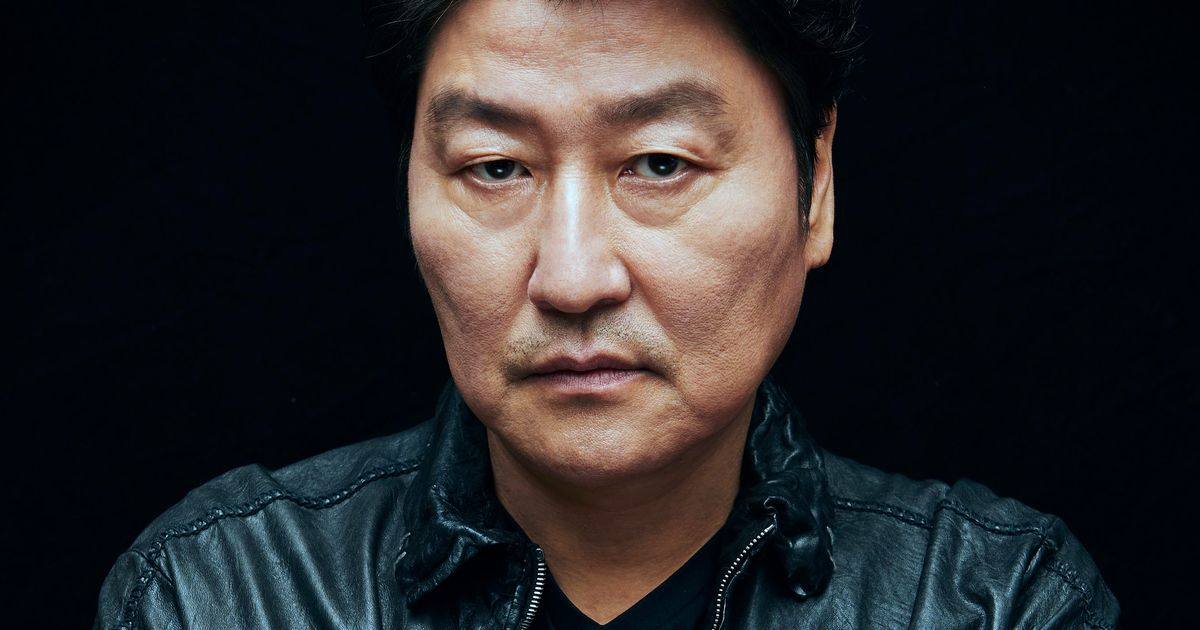

###Director of the exercise: **David Lynch**


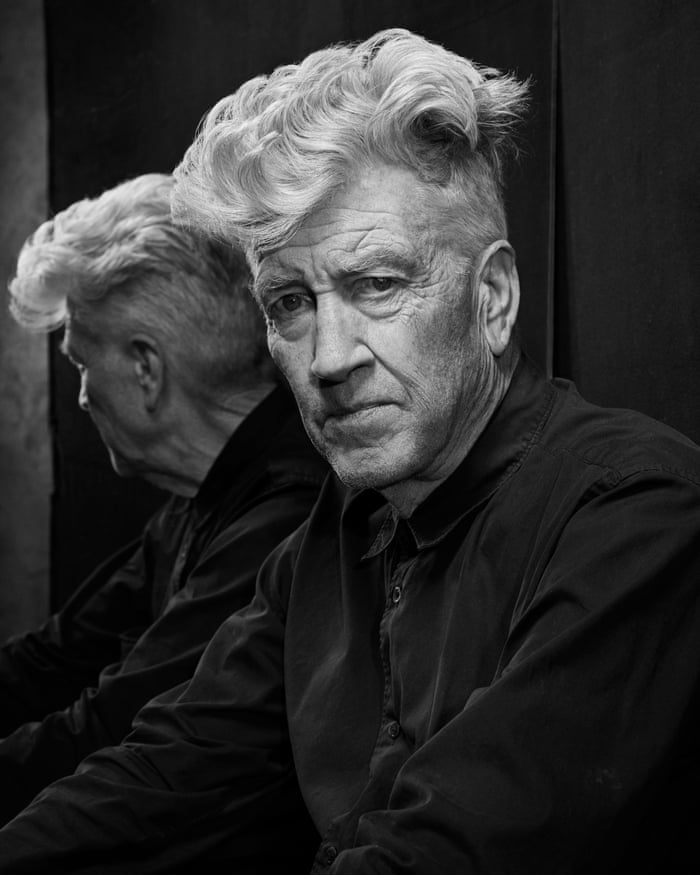

###Movie of the exercise: **The Usual Suspects**

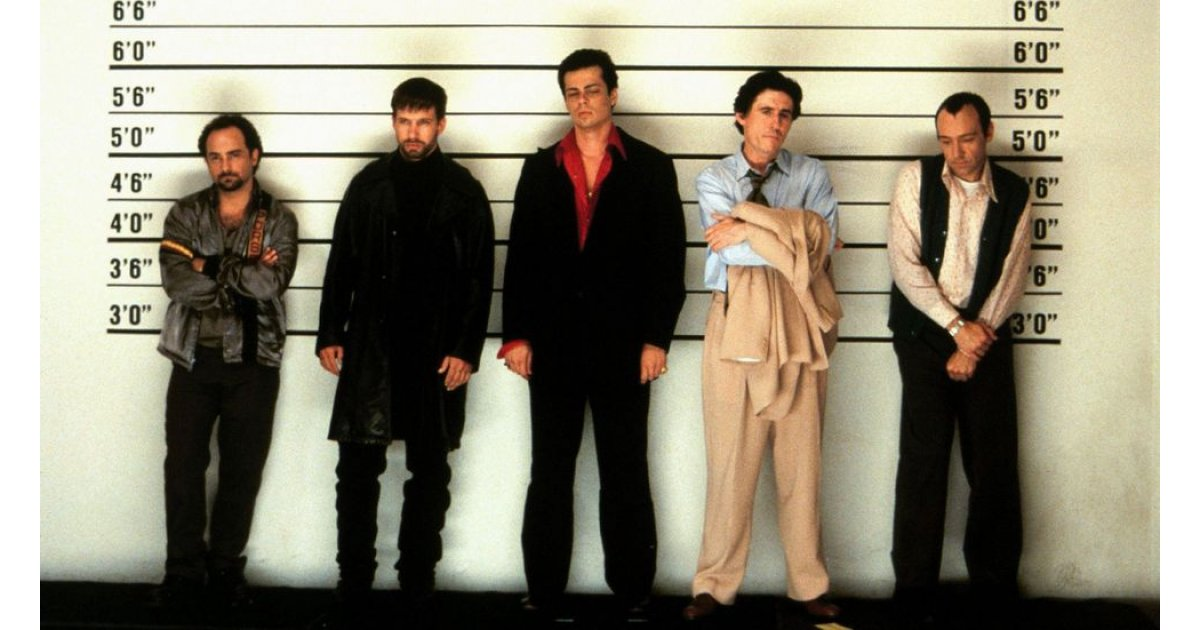

###Any suggestions by you, master?

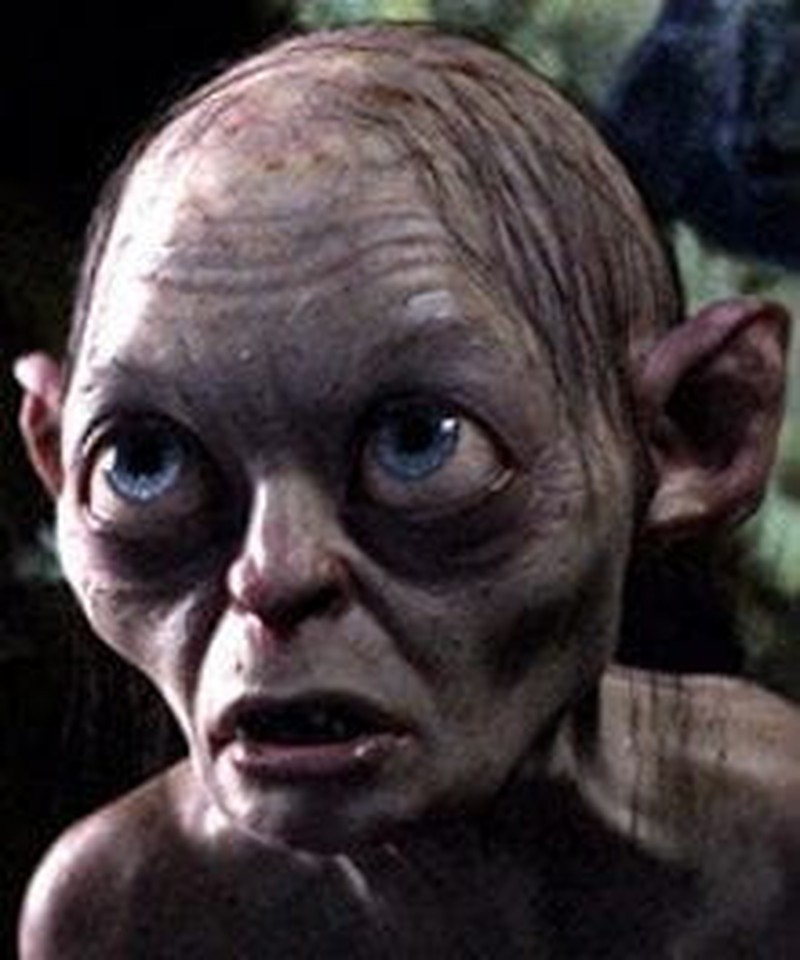